In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import yaml
import scipy.stats as stats

%matplotlib inline

In [3]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Configuration file not found!")

In [4]:
# Load Datasets
df_clients = pd.read_csv('../data/raw_data_txt/df_final_demo.txt', sep=',')
df_web_1 = pd.read_csv('../data/raw_data_txt/df_final_web_data_pt_1.txt', sep=',')
df_web_2 = pd.read_csv('../data/raw_data_txt/df_final_web_data_pt_2.txt', sep=',')
df_groups = pd.read_csv('../data/raw_data_txt/df_final_experiment_clients.txt', sep=',')
# Merge Logs
df_logs = pd.concat([df_web_1, df_web_2], ignore_index=True)

In [5]:
# Load the DataFrame from a pickle file
df_full = pd.read_pickle(config['data']['clean']['df_full'])
df_full

,client_id,visitor_id,visit_id,process_step,date_time,variation,client_tenure_years,client_tenure_months,age,gender,number_of_accounts,balance,calls_6_months,logons_6_months
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79.0,U,2,189023.86,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79.0,U,2,189023.86,1,4
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79.0,U,2,189023.86,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79.0,U,2,189023.86,1,4
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79.0,U,2,189023.86,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55.0,U,2,153238.83,3,6
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34.0,M,3,141808.05,6,9
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34.0,M,3,141808.05,6,9
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34.0,M,3,141808.05,6,9


# Frequency of age range

In [7]:
#frequency of age that uses web the most
frequency_age = df_full['age'].value_counts()
frequency_age 

age
58.5    4590
62.5    4546
59.5    4501
57.5    4389
52.5    4338
        ... 
17.0      19
89.5      17
96.0      10
95.5       6
94.5       5
Name: count, Length: 158, dtype: int64

# Frequency of age and variation

In [8]:
variation_table = df_full['variation'].value_counts()
variation_table

variation
Test       176699
Control    140536
Name: count, dtype: int64

In [9]:
# A frequency table for 'Variation' and 'clnt_age'
Vari_age_table = pd.crosstab(index=df_full['variation'], columns=df_full['age'])

# Display the frequency table
print(Vari_age_table)


age        17.0  17.5  18.0  18.5  19.0  19.5  20.0  20.5  21.0  21.5  ...  \
variation                                                              ...   
Control      11   179   174   252   198   455   304   604   350   674  ...   
Test          8   232   140   456   258   510   317   674   476  1003  ...   

age        91.0  91.5  92.0  92.5  93.0  93.5  94.0  94.5  95.5  96.0  
variation                                                              
Control      17     6    24    18    12    32    11     0     0     4  
Test         22    19    15    10    15     0    13     5     6     6  

[2 rows x 158 columns]


In [18]:


# Group by 'age' and 'variation', then count occurrences
most_frequent_variation = df_full.groupby(['age', 'variation']).size().reset_index(name='count')

# Get the most frequent variation for each age
most_frequent_variation = most_frequent_variation.loc[most_frequent_variation.groupby('age')['count'].idxmax()]

# Create separate tables for each group
control_group = most_frequent_variation[most_frequent_variation['variation'] == 'Control']
test_group = most_frequent_variation[most_frequent_variation['variation'] == 'Test']
non_experiment_group = most_frequent_variation[most_frequent_variation['variation'] == 'Non-Experiment']

# Display the results
print("Control Group:")
print(control_group)

print("\nTest Group:")
print(test_group)

# Get the top 3 ages most frequent users of Vanguard in each group
top_3_control = control_group.nlargest(3, 'count')[['age', 'count']]
top_3_test = test_group.nlargest(3, 'count')[['age', 'count']]


# Display the top 3 ages for each group
print(f"\nThe top 3 ages of most frequent users of Vanguard in the control group are: {top_3_control['age'].tolist()}")
print(f"The top 3 ages of most frequent users of Vanguard in the test group are: {top_3_test['age'].tolist()}")


Control Group:
      age variation  count
0    17.0   Control     11
4    18.0   Control    174
24   23.0   Control    788
28   24.0   Control    964
32   25.0   Control   1251
36   26.0   Control   1050
40   27.0   Control   1199
44   28.0   Control   1299
48   29.0   Control   1241
76   36.0   Control   1133
88   39.0   Control    953
96   41.0   Control    968
108  44.0   Control   1175
120  47.0   Control   1223
136  51.0   Control   1364
208  69.0   Control    826
232  75.0   Control    529
254  80.5   Control    196
260  82.0   Control    177
272  85.0   Control     95
276  86.0   Control     78
284  88.0   Control    157
299  92.0   Control     24
301  92.5   Control     18
305  93.5   Control     32

Test Group:
      age variation  count
3    17.5      Test    232
7    18.5      Test    456
9    19.0      Test    258
11   19.5      Test    510
13   20.0      Test    317
..    ...       ...    ...
304  93.0      Test     15
307  94.0      Test     13
308  94.5      Test      5


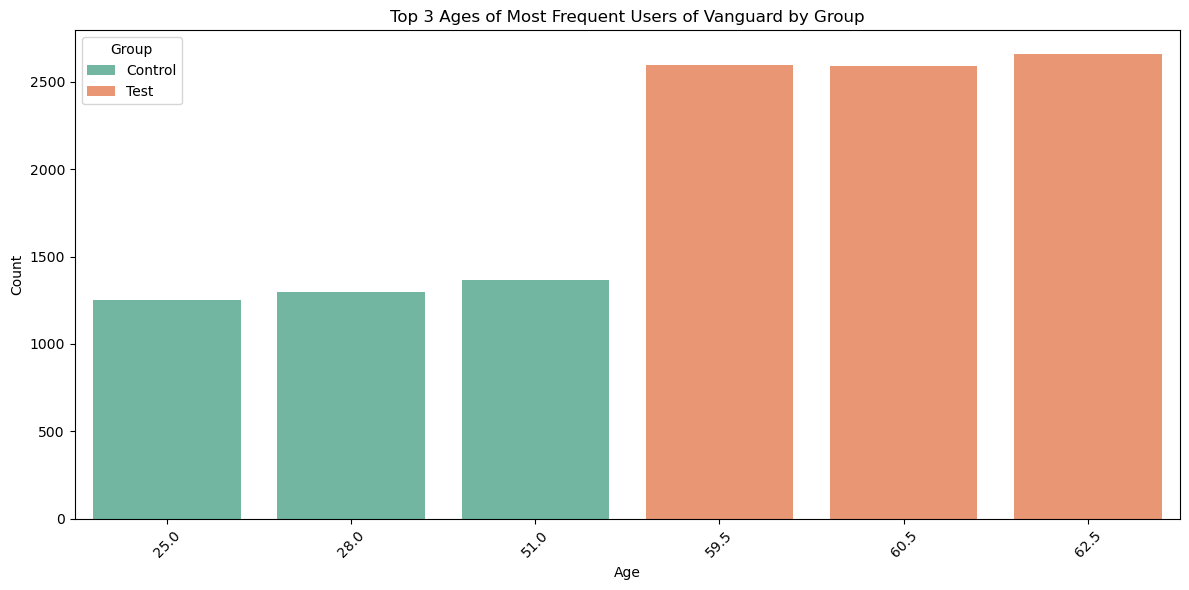

In [19]:


# Assuming most_frequent_variation is already created and contains the necessary data

# Create separate DataFrames for each group
control_group = most_frequent_variation[most_frequent_variation['variation'] == 'Control']
test_group = most_frequent_variation[most_frequent_variation['variation'] == 'Test']
non_experiment_group = most_frequent_variation[most_frequent_variation['variation'] == 'Non-Experiment']

# Get the top 3 ages most frequent users in each group
top_3_control = control_group.nlargest(3, 'count')[['age', 'count']]
top_3_test = test_group.nlargest(3, 'count')[['age', 'count']]
top_3_non_experiment = non_experiment_group.nlargest(3, 'count')[['age', 'count']]

# Combine the data into one DataFrame for visualization
top_3_combined = pd.concat([
    top_3_control.assign(group='Control'),
    top_3_test.assign(group='Test'),
    top_3_non_experiment.assign(group='Non-Experiment')
])

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', hue='group', data=top_3_combined, palette='Set2')

plt.title('Top 3 Ages of Most Frequent Users of Vanguard by Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Control Group and Age

In [11]:
# Filter for only the Control group
control_group_variation = most_frequent_variation[most_frequent_variation['variation'] == 'Control']

# Count occurrences of 'clnt_age' for the Control group
control_age_frequency = control_group_variation.groupby('age')['count'].sum().reset_index()

# Print the age frequency
print(control_age_frequency)

     age  count
0   17.0     11
1   18.0    174
2   23.0    788
3   24.0    964
4   25.0   1251
5   26.0   1050
6   27.0   1199
7   28.0   1299
8   29.0   1241
9   36.0   1133
10  39.0    953
11  41.0    968
12  44.0   1175
13  47.0   1223
14  51.0   1364
15  69.0    826
16  75.0    529
17  80.5    196
18  82.0    177
19  85.0     95
20  86.0     78
21  88.0    157
22  92.0     24
23  92.5     18
24  93.5     32


In [12]:
- 

Control Group Variation:
      age variation  count
0    17.0   Control     11
4    18.0   Control    174
24   23.0   Control    788
28   24.0   Control    964
32   25.0   Control   1251
36   26.0   Control   1050
40   27.0   Control   1199
44   28.0   Control   1299
48   29.0   Control   1241
76   36.0   Control   1133
88   39.0   Control    953
96   41.0   Control    968
108  44.0   Control   1175
120  47.0   Control   1223
136  51.0   Control   1364
208  69.0   Control    826
232  75.0   Control    529
254  80.5   Control    196
260  82.0   Control    177
272  85.0   Control     95
276  86.0   Control     78
284  88.0   Control    157
299  92.0   Control     24
301  92.5   Control     18
305  93.5   Control     32

Control Age Frequency:
     age  count
0   17.0     11
1   18.0    174
2   23.0    788
3   24.0    964
4   25.0   1251
5   26.0   1050
6   27.0   1199
7   28.0   1299
8   29.0   1241
9   36.0   1133
10  39.0    953
11  41.0    968
12  44.0   1175
13  47.0   1223
14  51.0 

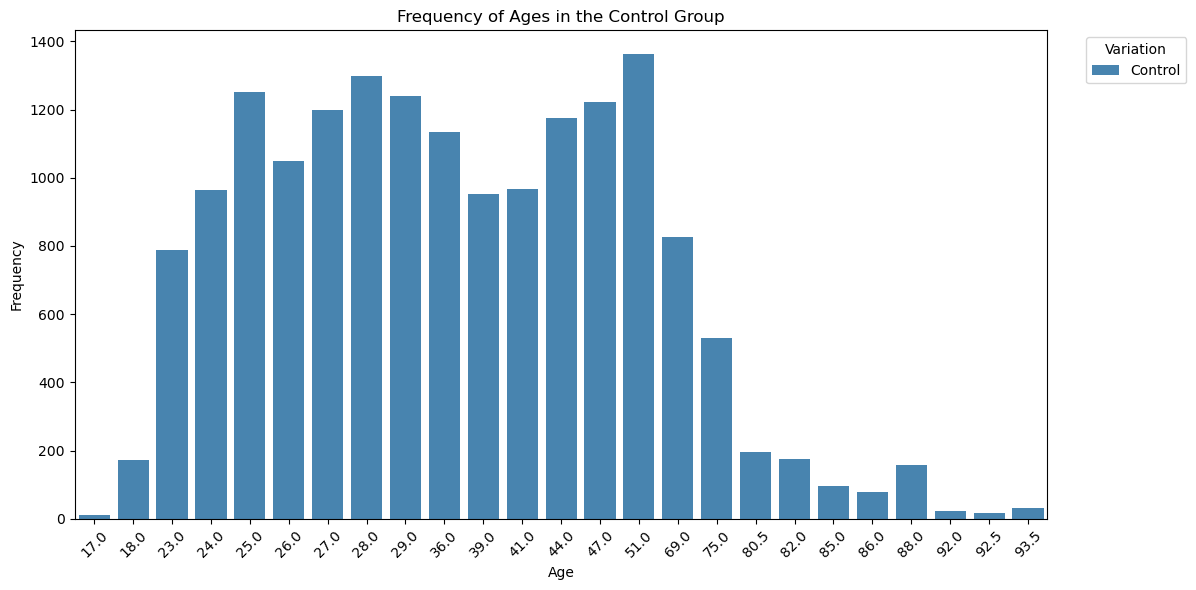

In [23]:

# Adding a dummy variable for hue
control_age_frequency['variation'] = 'Control'  # Adding a column for hue

# Create the bar plot with hue
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', hue='variation', data=control_age_frequency, palette='Blues_d', dodge=False)

plt.title('Frequency of Ages in the Control Group')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Variation', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Test Group and Age 

In [17]:
# Filter for only the Test group
test_group_variation = most_frequent_variation[most_frequent_variation['variation'] == 'Test']

# Print the result
print("Test Group Variation:")
print(test_group_variation)

# Test occurrences of 'clnt_age' for the Test group
test_age_frequency = test_group_variation.groupby('age')['count'].sum().reset_index()

# Print the age frequency
print("\nTest Age Frequency:")
print(test_age_frequency)

# Sort the entire DataFrame by 'count' in descending order
sorted_variation = most_frequent_variation.sort_values(by='count', ascending=False)

# Print the sorted DataFrame
print("\nSorted Variation by Count:")
print(sorted_variation)

# Filter for only the Test group and sort by 'count'
test_group_sorted = most_frequent_variation[most_frequent_variation['variation'] == 'Test'].sort_values(by='count', ascending=False)

# Print the sorted test group DataFrame
print("\nSorted Test Group by Count:")
print(test_group_sorted)

# Get the top 3 ages in the test group
top_3_ages = test_group_sorted.head(3)

# Print the result
print("\nThe top 3 ages in the test group that used Vanguard the most frequently are:")
for index, row in top_3_ages.iterrows():
    print(f"Age: {row['age']}, Count: {row['count']}")

Test Group Variation:
      age variation  count
3    17.5      Test    232
7    18.5      Test    456
9    19.0      Test    258
11   19.5      Test    510
13   20.0      Test    317
..    ...       ...    ...
304  93.0      Test     15
307  94.0      Test     13
308  94.5      Test      5
309  95.5      Test      6
311  96.0      Test      6

[133 rows x 3 columns]

Test Age Frequency:
      age  count
0    17.5    232
1    18.5    456
2    19.0    258
3    19.5    510
4    20.0    317
..    ...    ...
128  93.0     15
129  94.0     13
130  94.5      5
131  95.5      6
132  96.0      6

[133 rows x 2 columns]

Sorted Variation by Count:
      age variation  count
183  62.5      Test   2660
171  59.5      Test   2594
175  60.5      Test   2589
163  57.5      Test   2581
147  53.5      Test   2576
..    ...       ...    ...
307  94.0      Test     13
0    17.0   Control     11
309  95.5      Test      6
311  96.0      Test      6
308  94.5      Test      5

[158 rows x 3 columns]

Sort

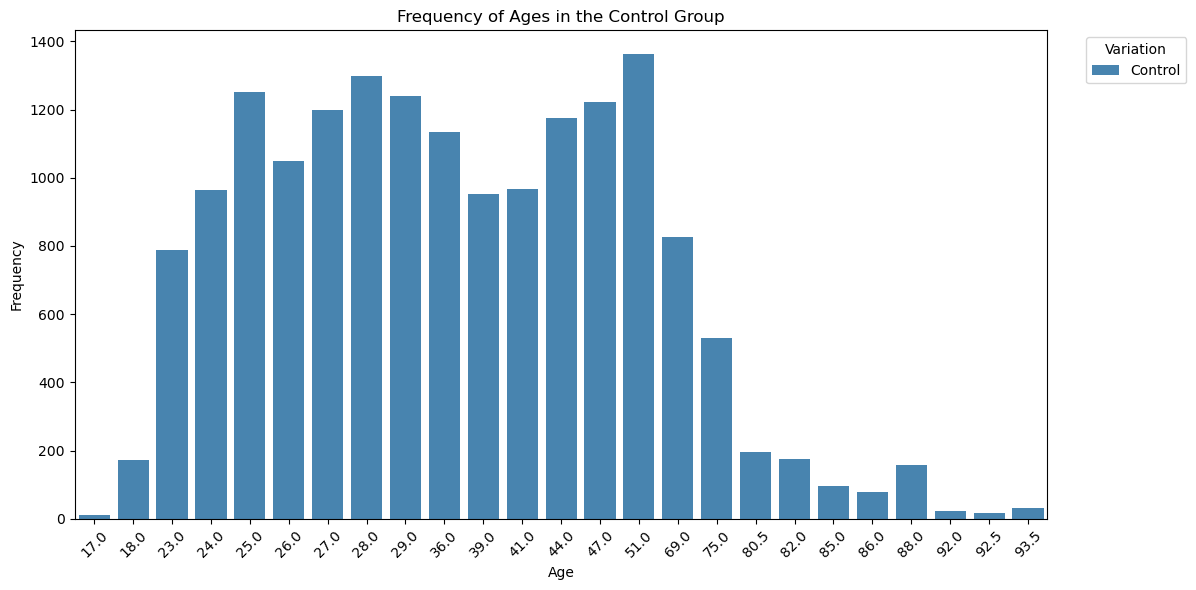

In [24]:

# Assuming test_age_frequency is already created and contains the necessary data
# Create a new DataFrame for the Test group
test_age_frequency = most_frequent_variation[most_frequent_variation['variation'] == 'Test'].groupby('age')['count'].sum().reset_index()

# Add a dummy variable for hue
test_age_frequency['variation'] = 'Test'  # Adding a column for hue

# Create the bar plot with hue
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', hue='variation', data=test_age_frequency, palette='Blues_d', dodge=False)

plt.title('Frequency of Ages in the Test Group')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Variation', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Statistics of Age

In [17]:
# Mean age for the test group
test_group = df_full[df_full['variation'] == 'Test']
mean_age_test_group = test_group['age'].mean()
print(f"The mean age of the test group is: {mean_age_test_group}")

The mean age of the test group is: 48.721650943129276


In [18]:
# Mean age for the control group

control_group = df_full[df_full['variation'] == 'Control']
mean_age_control_group = control_group['age'].mean()
print(f"The mean age of the control group is: {mean_age_control_group}")

The mean age of the control group is: 48.28398417487334


In [20]:
# mean age of range of people using vanguard 
mean_age = df_full['age'].mean()
print(mean_age)

48.52776333002348


In [21]:
#mode age of range of people using vanguard
mode_age = df_full['age'].mode()
print(mode_age)

0    58.5
Name: age, dtype: float64


In [22]:
# Measure of min/maxage range for the users in vanguard group
min_age = df_full['age'].min()
max_age = df_full['age'].max()
print(min_age)
print(max_age) 

17.0
96.0


# Measures of Dispersion for each group

In [24]:
# the control group
control_group = most_frequent_variation[most_frequent_variation['variation'] == 'Control']

# Calculate measures of dispersion for 'clnt_age' in the control group
variance_age = control_group['age'].var()
std_dev_age = control_group['age'].std()
min_age = control_group['age'].min()
max_age = control_group['age'].max()
range_age = max_age - min_age
quantiles_age = control_group['age'].quantile([0.25, 0.5, 0.75])

# Output the results
print("Variance of Ages:", variance_age)
print("Standard Deviation of Ages:", std_dev_age)
print("Minimum Age:", min_age)
print("Maximum Age:", max_age)
print("Range of Ages:", range_age)
print("Quantiles of Ages:\n", quantiles_age)

Variance of Ages: 783.2108333333332
Standard Deviation of Ages: 27.98590419002633
Minimum Age: 17.0
Maximum Age: 93.5
Range of Ages: 76.5
Quantiles of Ages:
 0.25    27.0
0.50    44.0
0.75    82.0
Name: age, dtype: float64


In [25]:
# the test group
test_group = most_frequent_variation[most_frequent_variation['variation'] == 'Test']

# Calculate measures of dispersion for 'clnt_age' in the test group
variance_age = test_group ['age'].var()
std_dev_age = test_group['age'].std()
min_age = test_group['age'].min()
max_age = test_group['age'].max()
range_age = max_age - min_age
quantiles_age = test_group['age'].quantile([0.25, 0.5, 0.75])

# Output the results
print("Variance of Ages:", variance_age)
print("Standard Deviation of Ages:", std_dev_age)
print("Minimum Age:", min_age)
print("Maximum Age:", max_age)
print("Range of Ages:", range_age)
print("Quantiles of Ages:\n", quantiles_age)

Variance of Ages: 477.9097744360901
Standard Deviation of Ages: 21.861147601077352
Minimum Age: 17.5
Maximum Age: 96.0
Range of Ages: 78.5
Quantiles of Ages:
 0.25    38.5
0.50    57.5
0.75    74.5
Name: age, dtype: float64


# Stats of Tenure by Year

In [28]:
# Mean age and tenure for the test group
test_group = df_full[df_full['variation'] == 'Test']

# Calculate mean age and mean tenure in months
mean_age_test_group = test_group['age'].mean()
mean_tenure_test_group = test_group['client_tenure_years'].mean()

# Print the results
print(f"The mean age of the test group is: {mean_age_test_group}")
print(f"The mean tenure in years of the test group is: {mean_tenure_test_group}")

The mean age of the test group is: 48.721650943129276
The mean tenure in years of the test group is: 12.181636568401633


In [29]:
# Mean age and tenure for the control group
control_group = df_full[df_full['variation'] == 'Control']

# Calculate mean age and mean tenure in years
mean_age_control_group = control_group['age'].mean()
mean_tenure_control_group = control_group['client_tenure_years'].mean()

# Print the results
print(f"The mean age of the control group is: {mean_age_control_group}")
print(f"The mean tenure in years of the control group is: {mean_tenure_control_group}")

The mean age of the control group is: 48.28398417487334
The mean tenure in years of the control group is: 12.167088859793932


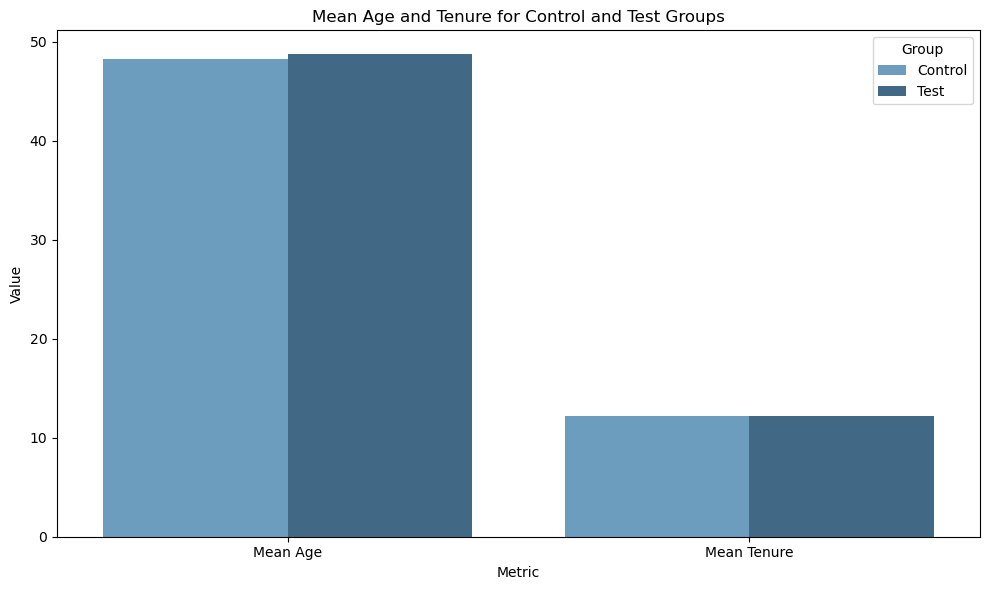

In [27]:


# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Group', data=summary_data, palette='Blues_d')

plt.title('Mean Age and Tenure for Control and Test Groups')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Group')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Proportion of Control Group and Age

In [31]:
# Filter for the Control group
control_group = df_full[df_full['variation'] == 'Control']

# Calculate variation groups and their counts for the Control group
variation_groups = control_group.groupby('variation')['age'].size().reset_index(name='Count')

# Print the variation groups
print("Variation Groups for Control Group:")
print(variation_groups)

# Calculate age frequency for the Control group
age_frequency = control_group.groupby('age').size().reset_index(name='Count')

# Print the age frequency
print("\nAge Frequency for Control Group:")
print(age_frequency)

# Calculate the proportion of variations for the Control group
variation_proportion = control_group['variation'].value_counts(normalize=True).reset_index(name='Proportion')
variation_proportion.columns = ['variation', 'Proportion']

# Print the variation proportions for Control group
print("\nProportion of Variations for Control Group:")
print(variation_proportion)

# Calculate the proportion of ages for the Control group
age_proportion = control_group['age'].value_counts(normalize=True).reset_index(name='Proportion')
age_proportion.columns = ['age', 'Proportion']

# Print the age proportions for Control group
print("\nProportion of Ages for Control Group:")
print(age_proportion)

# Calculate the total count for each variation and age group for the Control group
variation_age_proportion = control_group.groupby(['variation', 'age']).size().reset_index(name='Count')

# Calculate the proportion within each variation group
variation_age_proportion['Proportion'] = variation_age_proportion.groupby('variation')['Count'].transform(lambda x: x / x.sum())

# Print the combined proportion of variation and age for Control group
print("\nProportion of Variation and Age for Control Group:")
print(variation_age_proportion)

# Get the top 3 proportions for the Control group according to age
top_3_age_proportions = age_proportion.nlargest(3, 'Proportion')

# Print the final statement
top_3_ages = top_3_age_proportions['age'].tolist()
top_3_proportions = top_3_age_proportions['Proportion'].tolist()
print(f"\nThe top 3 proportions for the Control group according to age are: {list(zip(top_3_ages, top_3_proportions))}")

Variation Groups for Control Group:
  variation   Count
0   Control  140536

Age Frequency for Control Group:
      age  Count
0    17.0     11
1    17.5    179
2    18.0    174
3    18.5    252
4    19.0    198
..    ...    ...
150  92.5     18
151  93.0     12
152  93.5     32
153  94.0     11
154  96.0      4

[155 rows x 2 columns]

Proportion of Variations for Control Group:
  variation  Proportion
0   Control         1.0

Proportion of Ages for Control Group:
      age  Proportion
0    58.5    0.014786
1    59.5    0.013569
2    55.5    0.013470
3    61.5    0.013463
4    62.5    0.013420
..    ...         ...
150  17.0    0.000078
151  94.0    0.000078
152  91.5    0.000043
153  96.0    0.000028
154  90.0    0.000021

[155 rows x 2 columns]

Proportion of Variation and Age for Control Group:
    variation   age  Count  Proportion
0     Control  17.0     11    0.000078
1     Control  17.5    179    0.001274
2     Control  18.0    174    0.001238
3     Control  18.5    252    0.00

# Proportion of Test Group and Age

In [32]:
# Filter for the Test group
test_group = df_full[df_full['variation'] == 'Test']

# Calculate variation groups and their counts for the Test group
variation_groups = test_group.groupby('variation')['age'].size().reset_index(name='Count')

# Print the variation groups
print("Variation Groups for Test Group:")
print(variation_groups)

# Calculate age frequency for the Test group
age_frequency = test_group.groupby('age').size().reset_index(name='Count')

# Print the age frequency
print("\nAge Frequency for Test Group:")
print(age_frequency)

# Calculate the proportion of variations for the Test group
variation_proportion = test_group['variation'].value_counts(normalize=True).reset_index(name='Proportion')
variation_proportion.columns = ['variation', 'Proportion']

# Print the variation proportions for Test group
print("\nProportion of Variations for Test Group:")
print(variation_proportion)

# Calculate the proportion of ages for the Test group
age_proportion = test_group['age'].value_counts(normalize=True).reset_index(name='Proportion')
age_proportion.columns = ['age', 'Proportion']

# Print the age proportions for Test group
print("\nProportion of Ages for Test Group:")
print(age_proportion)

# Calculate the total count for each variation and age group for the Test group
variation_age_proportion = test_group.groupby(['variation', 'age']).size().reset_index(name='Count')

# Calculate the proportion within each variation group
variation_age_proportion['Proportion'] = variation_age_proportion.groupby('variation')['Count'].transform(lambda x: x / x.sum())

# Print the combined proportion of variation and age for Test group
print("\nProportion of Variation and Age for Test Group:")
print(variation_age_proportion)

# Get the top 3 proportions for the Test group according to age
top_3_age_proportions = age_proportion.nlargest(3, 'Proportion')

# Print the final statement
top_3_ages = top_3_age_proportions['age'].tolist()
top_3_proportions = top_3_age_proportions['Proportion'].tolist()
print(f"\nThe top 3 proportions for the Test group according to age are: {list(zip(top_3_ages, top_3_proportions))}")

Variation Groups for Test Group:
  variation   Count
0      Test  176699

Age Frequency for Test Group:
      age  Count
0    17.0      8
1    17.5    232
2    18.0    140
3    18.5    456
4    19.0    258
..    ...    ...
152  93.0     15
153  94.0     13
154  94.5      5
155  95.5      6
156  96.0      6

[157 rows x 2 columns]

Proportion of Variations for Test Group:
  variation  Proportion
0      Test         1.0

Proportion of Ages for Test Group:
      age  Proportion
0    62.5    0.015054
1    59.5    0.014680
2    60.5    0.014652
3    57.5    0.014607
4    53.5    0.014578
..    ...         ...
152  86.0    0.000051
153  17.0    0.000045
154  96.0    0.000034
155  95.5    0.000034
156  94.5    0.000028

[157 rows x 2 columns]

Proportion of Variation and Age for Test Group:
    variation   age  Count  Proportion
0        Test  17.0      8    0.000045
1        Test  17.5    232    0.001313
2        Test  18.0    140    0.000792
3        Test  18.5    456    0.002581
4        T

# Tenure and Age of Control Group

In [36]:
# Filter for control group
filtered_df = df_full[df_full['variation'] == 'Control']

# Get top 3 ages with the longest tenure
longest_tenure = filtered_df.nlargest(3, 'client_tenure_years')[['age', 'client_tenure_years']]

# Get top 3 ages with the least tenure
least_tenure = filtered_df.nsmallest(3, 'client_tenure_years')[['age', 'client_tenure_years']]

# Display the results
print("Top 3 Ages with Longest Tenure:")
print(longest_tenure)

print("\nTop 3 Ages with Least Tenure:")
print(least_tenure)

Top 3 Ages with Longest Tenure:
        age  client_tenure_years
25648  48.5                   55
25649  48.5                   55
25650  48.5                   55

Top 3 Ages with Least Tenure:
        age  client_tenure_years
11989  19.5                    2
11990  19.5                    2
11991  19.5                    2


# Tenure and Age of Test Group

In [37]:
# Filter for test group
filtered_df = df_full[df_full['variation'] == 'Test']

# Get top 3 ages with the longest tenure
longest_tenure = filtered_df.nlargest(3, 'client_tenure_years')[['age', 'client_tenure_years']]
longest_tenure['client_tenure_years'] = longest_tenure['client_tenure_years'].astype(int)  # Convert to integer

# Get top 3 ages with the least tenure
least_tenure = filtered_df.nsmallest(3, 'client_tenure_years')[['age', 'client_tenure_years']]
least_tenure['client_tenure_years'] = least_tenure['client_tenure_years'].astype(int)  # Convert to integer

# Display the results
print("Top 3 Ages with Longest Tenure:")
print(longest_tenure)

print("\nTop 3 Ages with Least Tenure:")
print(least_tenure)

Top 3 Ages with Longest Tenure:
         age  client_tenure_years
119095  42.5                   55
119096  42.5                   55
119097  42.5                   55

Top 3 Ages with Least Tenure:
        age  client_tenure_years
19475  58.5                    2
19476  58.5                    2
19477  58.5                    2


# The most and least amount of Log-ins according to Age and Variant Group 

In [13]:


# Function to get longest tenure and logon counts for a given group

def get_longest_tenure_and_logons(df, group_name):
    # Get the top 3 ages with the longest tenure
    longest_tenure = df.nlargest(3, 'client_tenure_years')[['age', 'client_tenure_years', 'logons_6_months']]
    longest_tenure['Group'] = group_name
    
    # Get the most frequent logon
    most_logons = longest_tenure.nlargest(1, 'logons_6_months')
    
    # Get the least frequent logon
    least_logons = longest_tenure.nsmallest(1, 'logons_6_months')
    
    return most_logons, least_logons

# Filter for each group
test_group = df_full[df_full['variation'] == 'Test']
control_group = df_full[df_full['variation'] == 'Control']


# Get longest tenure and logons for each group
most_tenure_test, least_tenure_test = get_longest_tenure_and_logons(test_group, 'Test')
most_tenure_control, least_tenure_control = get_longest_tenure_and_logons(control_group, 'Control')


# Display results and summary statements
def print_summary(most_tenure, least_tenure, group_name):
    most_age = most_tenure['age'].values[0]
    most_tenure_value = int(most_tenure['client_tenure_years'].values[0])  # Convert to integer
    most_logons = most_tenure['logons_6_months'].values[0]  # Get the number of logons

    least_age = least_tenure['age'].values[0]
    least_tenure_value = int(least_tenure['client_tenure_years'].values[0])  # Convert to integer
    least_logons = least_tenure['logons_6_months'].values[0]

    # Updated print statements
    print(f"This {most_age} year old with {most_tenure_value} years tenure in the {group_name} group logged on the most in 6 months. They logged on {most_logons} times.")
    print(f"This {least_age} year old with {least_tenure_value} years tenure in the {group_name} group logged on the least in 6 months. They logged on {least_logons} times.")

# Example usage
print_summary(most_tenure_test, least_tenure_test, 'Test')
print_summary(most_tenure_control, least_tenure_control, 'Control')

This 42.5 year old with 55 years tenure in the Test group logged on the most in 6 months. They logged on 4 times.
This 42.5 year old with 55 years tenure in the Test group logged on the least in 6 months. They logged on 4 times.
This 48.5 year old with 55 years tenure in the Control group logged on the most in 6 months. They logged on 3 times.
This 48.5 year old with 55 years tenure in the Control group logged on the least in 6 months. They logged on 3 times.


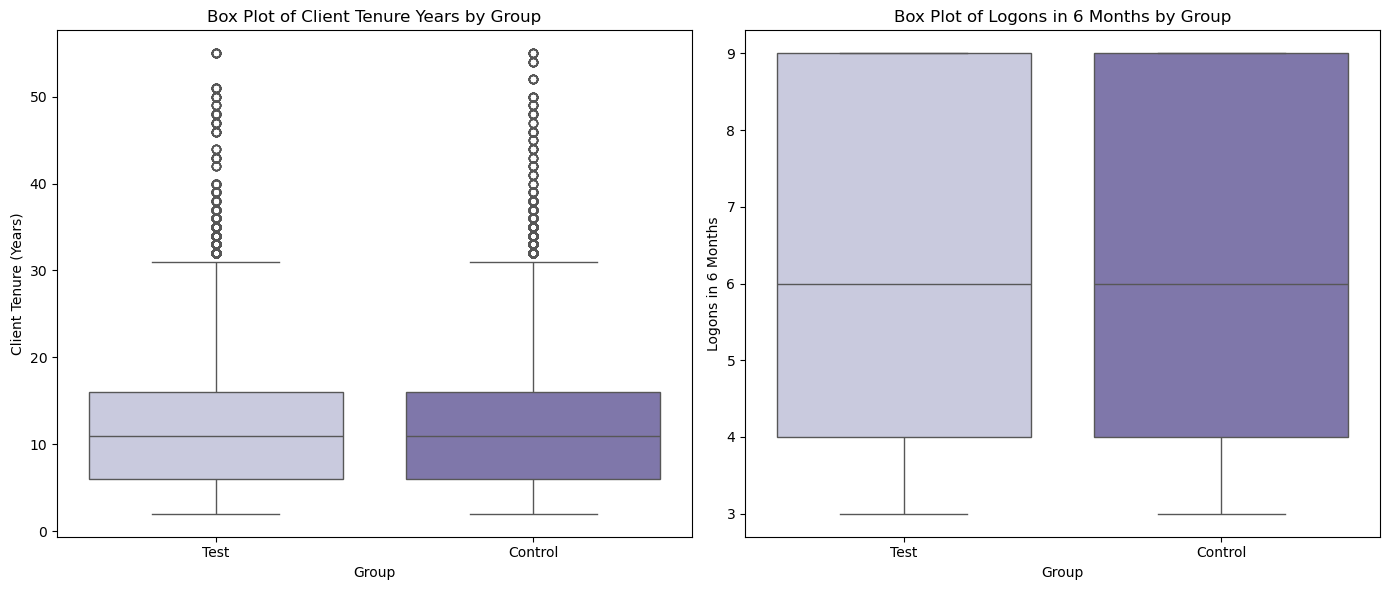

In [29]:


# Create box plots for client tenure
plt.figure(figsize=(14, 6))

# Box plot for client tenure years
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='client_tenure_years', data=summary_data, hue='Group', palette='Purples', legend=False)
plt.title('Box Plot of Client Tenure Years by Group')
plt.xlabel('Group')
plt.ylabel('Client Tenure (Years)')

# Box plot for logons in 6 months
plt.subplot(1, 2, 2)
sns.boxplot(x='Group', y='logons_6_months', data=summary_data, hue='Group', palette='Purples', legend=False)
plt.title('Box Plot of Logons in 6 Months by Group')
plt.xlabel('Group')
plt.ylabel('Logons in 6 Months')

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# The most and least amount of Calls according to Age and Variant Group 

In [14]:
# Function to get longest tenure and call counts for a given group

def get_longest_tenure_and_calls(df, group_name):
    # Get the top 3 ages with the longest tenure
    longest_tenure = df.nlargest(3, 'client_tenure_years')[['age', 'client_tenure_years', 'calls_6_months']]
    longest_tenure['Group'] = group_name
    
    # Get the most frequent calls
    most_calls = longest_tenure.nlargest(1, 'calls_6_months')
    
    # Get the least frequent calls
    least_calls = longest_tenure.nsmallest(1, 'calls_6_months')
    
    return most_calls, least_calls

# Filter for each group
test_group = df_full[df_full['variation'] == 'Test']
control_group = df_full[df_full['variation'] == 'Control']


# Get longest tenure and calls for each group
most_tenure_test, least_tenure_test = get_longest_tenure_and_calls(test_group, 'Test')
most_tenure_control, least_tenure_control = get_longest_tenure_and_calls(control_group, 'Control')


# Display results and summary statements
def print_summary(most_tenure, least_tenure, group_name):
    most_age = most_tenure['age'].values[0]
    most_tenure_value = int(most_tenure['client_tenure_years'].values[0])  # Convert to integer
    most_calls = most_tenure['calls_6_months'].values[0]  # Get the number of calls

    least_age = least_tenure['age'].values[0]
    least_tenure_value = int(least_tenure['client_tenure_years'].values[0])  # Convert to integer
    least_calls = least_tenure['calls_6_months'].values[0]

    # Updated print statement
    print(f"This {most_age} year old with {most_tenure_value} years tenure in the {group_name} group called the most in 6 months. They called {most_calls} times.")
    print(f"This {least_age} year old with {least_tenure_value} years tenure in the {group_name} group called the least in 6 months. They called {least_calls} times.")

# Example usage
print_summary(most_tenure_test, least_tenure_test, 'Test')
print_summary(most_tenure_control, least_tenure_control, 'Control')


This 42.5 year old with 55 years tenure in the Test group called the most in 6 months. They called 1 times.
This 42.5 year old with 55 years tenure in the Test group called the least in 6 months. They called 1 times.
This 48.5 year old with 55 years tenure in the Control group called the most in 6 months. They called 0 times.
This 48.5 year old with 55 years tenure in the Control group called the least in 6 months. They called 0 times.


In [43]:
import pandas as pd
from scipy import stats

# Load the DataFrame
df_full = pd.read_pickle(config['data']['clean']['df_full'])

# Step 1: Filter users with tenure greater than 6 months
df_filtered = df_full[df_full['client_tenure_years'] > 6]

# Step 2: Analyze Performance
average_balance = df_filtered['balance'].mean()
print(f"Average Balance for users with > 6 months tenure: {average_balance}")

# Step 3: Analyze Correlations
correlation_calls = df_filtered['calls_6_months'].corr(df_filtered['balance'])
correlation_logons = df_filtered['logons_6_months'].corr(df_filtered['balance'])
print(f"Correlation between calls and balance: {correlation_calls}")
print(f"Correlation between logons and balance: {correlation_logons}")

# Step 4: Statistical Testing
tenure_less_than_6 = df_full[df_full['client_tenure_years'] <= 6]['balance']
t_stat, p_value = stats.ttest_ind(df_filtered['balance'].dropna(), tenure_less_than_6.dropna())
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Average Balance for users with > 6 months tenure: 181842.54149015513
Correlation between calls and balance: 0.1763078506204286
Correlation between logons and balance: 0.18389552643213009
T-statistic: 57.620486828464635, P-value: 0.0


# T-statistic: 57.620486828464635, P-value: 0.0

# Interpretation:
T-statistic: A value of 57.62 indicates a substantial difference in the average balance between users with more than 6 months of tenure versus those with 6 months or less.
P-value: A p-value of 0.0 (typically reported as < 0.001) indicates that the difference in averages is statistically significant. This suggests that there is a very strong likelihood that the observed difference in balances is not due to random chance.

Users with more than 6 months of tenure have a significantly higher average balance compared to newer users.
There is a weak positive correlation between both calls and logons with balance, indicating that while there is some relationship, it is not strong enough to imply causation.
The statistical test confirms that the difference in performance (balance) between the two groups is significant.


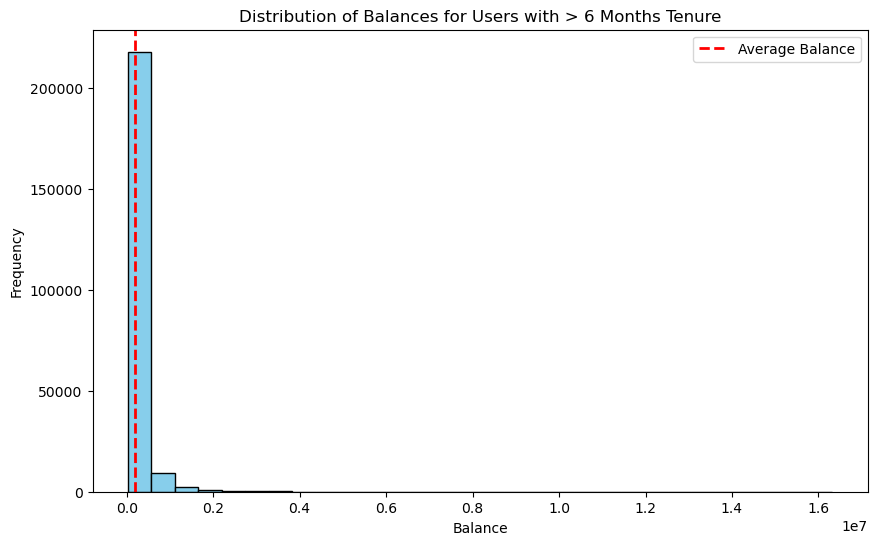

In [43]:
# Load the DataFrame
df_full = pd.read_pickle(config['data']['clean']['df_full'])

# Step 1: Filter users with tenure greater than 6 months
df_filtered = df_full[df_full['client_tenure_years'] > 6]

# Check if df_filtered is empty
if df_filtered.empty:
    print("No data available for users with more than 6 months tenure.")
else:
    # Step 2: Calculate average balance
    average_balance = df_filtered['balance'].mean()
    
    # Step 3: Create the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df_filtered['balance'], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(average_balance, color='red', linestyle='dashed', linewidth=2, label='Average Balance')
    plt.title('Distribution of Balances for Users with > 6 Months Tenure')
    plt.xlabel('Balance')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

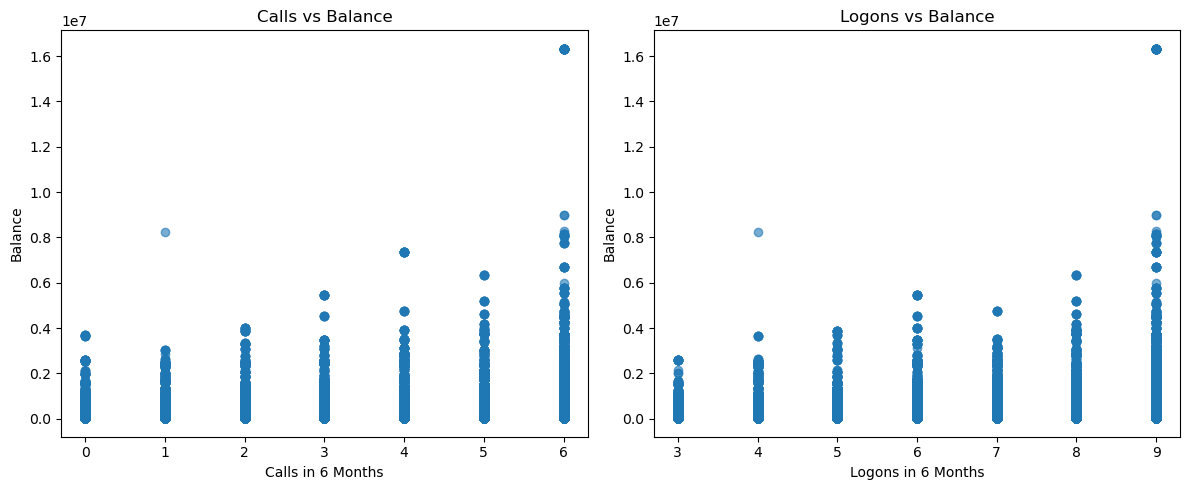

In [39]:

#Scatter plots that visually represent the correlation between the number of calls/logons and account balances. Two scatter plots, one for calls and one for logons.
# Scatter plot for calls and balance
plt.figure(figsize=(12, 5))

# Calls vs Balance
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['calls_6_months'], df_filtered['balance'], alpha=0.6)
plt.title('Calls vs Balance')
plt.xlabel('Calls in 6 Months')
plt.ylabel('Balance')

# Logons vs Balance
plt.subplot(1, 2, 2)
plt.scatter(df_filtered['logons_6_months'], df_filtered['balance'], alpha=0.6)
plt.title('Logons vs Balance')
plt.xlabel('Logons in 6 Months')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()

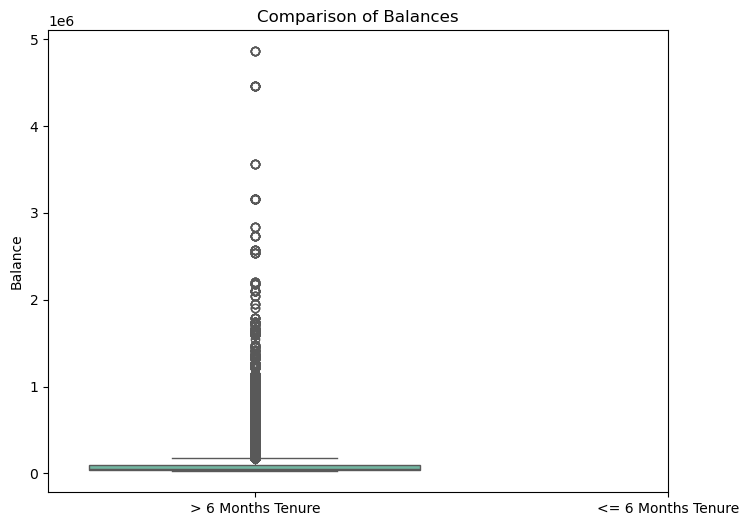

In [40]:
#A box plot to help visualize the differences in balances between users with more than 6 months of tenure and those with 6 months or less.
plt.figure(figsize=(8, 6))
sns.boxplot(data=[df_filtered['balance'], df_full[df_full['client_tenure_years'] <= 6]['balance']],
            palette='Set2')
plt.xticks([0, 1], ['> 6 Months Tenure', '<= 6 Months Tenure'])
plt.title('Comparison of Balances')
plt.ylabel('Balance')
plt.show()

1.  The attached analysis focuses on the financial behavior of users based on their account balances, specifically targeting users with a tenure greater than six months. It incorporates statistical testing, correlation analysis, and visualizations to draw insights from the data.

- T-Test Results
- T-Statistic and P-Value:
  
- T-Statistic: A value of 576.2604886284864 suggests a very strong difference between the two groups being compared (users with more than 6 months of tenure vs. those with 6 months or less).

- P-Value: The reported P-value of 0.0 indicates that the difference observed is statistically significant. In hypothesis testing, a P-value below a significance level (commonly 0.05) suggests that the null hypothesis can be rejected. In this case, it implies that there is a significant difference in the average balances of users based on their tenure.

- Interpretation of Results:
The analysis concludes that users with more than 6 months of tenure have a significantly different account balance compared to those with shorter tenure. The extremely high T-statistic and a P-value of 0.0 suggest that this difference is not due to random chance, indicating a strong relationship between client tenure and balance.


2.  Distribution of Balances
A histogram is used to visualize the distribution of balances for users with more than 6 months of tenure. The histogram provides insights into:

- Skewness: If the data is skewed to the left or right, it can indicate the presence of outliers or the general distribution pattern of balances.
Average Balance: A vertical line indicating the average balance helps viewers quickly identify where the average lies within the distribution.
Correlation Analysis
Scatter Plots:

- Calls vs. Balance: A scatter plot may depict the relationship between the number of calls made by users in the last six months and their account balance. This can help assess whether increased engagement (measured by calls) correlates with higher balances.
Logons vs. Balance: Similarly, a scatter plot for logons shows if there's a correlation between the frequency of logons and account balances.
Insights from Correlation:

- Positive or negative correlations can be determined visually. If the points trend upward, it indicates a positive correlation; if downward, a negative correlation. The strength of the correlation can also be inferred based on how tightly the points cluster around a line.

3. Comparison of Balances
A box plot compares the balances of users with different tenures. This visualization allows for:

- Identifying Outliers: Box plots highlight outliers that might skew the average balance.

- Comparing Medians: The median line within the box indicates the central tendency, which can be compared across groups.

- Spread of Data: The interquartile range (IQR) shows the spread of the middle 50% of the data, providing insights into balance variability among users.

# Conclusion

The analysis effectively employs statistical methods and visualizations to assess the financial behavior of users based on their tenure. The significant difference in balances, highlighted by the T-test, combined with correlation visuals and distribution insights, provides a comprehensive view of how user engagement metrics (calls and logons) relate to account balances. This information can guide strategic decisions for customer engagement and retention efforts.

